# TMDB 10000 Movie Visualization

## Load necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

 ## Load the dataset using pandas read_csv (.read_csv() function takes a path to a CSV file and reads the data into a Pandas DataFrame object)

In [3]:

df=pd.read_csv('movies-tmdb-10000.csv')

In [412]:
# Unnamed: 0 , first column is not required as index column is already present.
df

,title,release_date,vote_average,vote_count,original_language,popularity,Year,transformed_text,num_words
0,The Godfather,1972-03-14,8.7,17537,en,103.429,1972,spanning years 1945 1955 chronicle fictional c...,"[spanning, years, 1945, 1955, chronicle, ficti..."
1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717,1994,framed 1940s double murder wife lover upstandi...,"[framed, 1940s, double, murder, wife, lover, u..."
2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971,2022,malena gets second chance life magically turns...,"[malena, gets, second, chance, life, magically..."
3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793,2022,unlikely friendship boy mole fox horse traveli...,"[unlikely, friendship, boy, mole, fox, horse, ..."
4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662,1974,continuing saga corleone crime family young vi...,"[continuing, saga, corleone, crime, family, yo..."
...,...,...,...,...,...,...,...,...,...
9995,The Night Before the Exams Today,2007-02-14,5.4,644,it,5.508,2007,reunites cast reprising characters 2006 origin...,"[reunites, cast, reprising, characters, 2006, ..."
9996,Land of the Lost,2009-06-05,5.4,1143,en,15.788,2009,latest expedition rick marshall sucked vortex ...,"[latest, expedition, rick, marshall, sucked, v..."
9997,G-Force,2009-07-24,5.4,1659,en,13.003,2009,team trained secret agent animals guinea pigs ...,"[team, trained, secret, agent, animals, guinea..."
9998,Intruders,2011-09-12,5.4,437,en,7.006,2011,though one see hollow face lurks corners despe...,"[though, one, see, hollow, face, lurks, corner..."


In [8]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,title,overview,release_date,vote_average,vote_count,original_language,popularity
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662


## Check null values in dataset

In [10]:
df.isnull().sum()

title                0
overview             2
release_date         0
vote_average         0
vote_count           0
original_language    0
popularity           0
dtype: int64

In [22]:
df[df['overview'].isnull()]  

,title,overview,release_date,vote_average,vote_count,original_language,popularity
9112,"Amore, bugie e calcetto",NaN,2008-04-04,5.8,203,en,5.811
9862,Incognito,NaN,2009-04-28,5.5,218,fr,6.029


### we can drop these 2 movies as overview column value is missing and from 10000 movie , we can skip these movies

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

title                0
overview             0
release_date         0
vote_average         0
vote_count           0
original_language    0
popularity           0
dtype: int64

## Find duplicated data in dataset

In [29]:
df.duplicated().sum()

0

## Check metadata for dataset like datatypes, null values, column names, total row count and memory used.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9998 non-null   object 
 1   overview           9998 non-null   object 
 2   release_date       9998 non-null   object 
 3   vote_average       9998 non-null   float64
 4   vote_count         9998 non-null   int64  
 5   original_language  9998 non-null   object 
 6   popularity         9998 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 624.9+ KB


In [31]:
df.head()

,title,overview,release_date,vote_average,vote_count,original_language,popularity
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662


### We can see release_date column is object it should be timestamp, lets convert this


In [33]:
df['release_date']=pd.to_datetime(df['release_date'])

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              9998 non-null   object        
 1   overview           9998 non-null   object        
 2   release_date       9998 non-null   datetime64[ns]
 3   vote_average       9998 non-null   float64       
 4   vote_count         9998 non-null   int64         
 5   original_language  9998 non-null   object        
 6   popularity         9998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 624.9+ KB


### Lets create new features from release_date

In [60]:
df['Day']=        pd.to_datetime(df['release_date']).dt.day

df['Month']=        pd.to_datetime(df['release_date']).dt.month

df['Year']=        pd.to_datetime(df['release_date']).dt.year

In [61]:
df.head()

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Day,Month,Year
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429,14,3,1972
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717,23,9,1994
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971,14,9,2022
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793,25,12,2022
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662,20,12,1974


In [413]:
print('Total movies we have',df['Year'].count())

Total movies we have 9998


In [135]:
df['Year'].nunique()  # find number of uniques values of year in dataset

112

## Check data distribution in original_language columns 

In [415]:
df['original_language'].nunique()  # 44 languages are present in dataset 

44

In [136]:
df['original_language'].unique()   # uniques languages values shown here

array(['en', 'es', 'hi', 'ja', 'ko', 'it', 'zh', 'pt', 'ru', 'fr', 'tr',
       'sv', 'hu', 'ar', 'de', 'cn', 'da', 'bn', 'nl', 'fa', 'th', 'pl',
       'te', 'sr', 'sh', 'et', 'id', 'uk', 'cs', 'no', 'ro', 'gl', 'el',
       'bs', 'hy', 'fi', 'is', 'ml', 'la', 'af', 'eu', 'nb', 'he', 'km'],
      dtype=object)

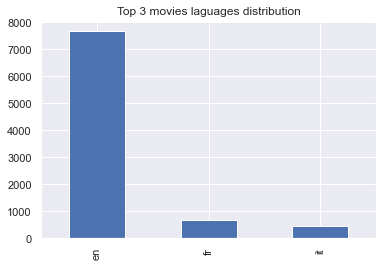

In [416]:
df['original_language'].value_counts()[:3].plot(kind='bar')
plt.title('Top 3 movies laguages distribution')
plt.show()

### In our dataset, English laguage movies are in major contribution 76% of total. So we have imbalanced data wrt to movies languages

## Movie releases trend over the years

C:\Users\rupeshv\AppData\Local\Temp\ipykernel_11972\1926076855.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


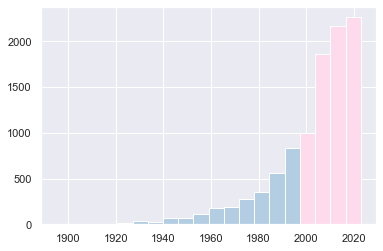

In [340]:
cmap = plt.get_cmap('Pastel1')
old = cmap(0.2)
latest = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins

fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(df.Year, 20)


[patches[i].set_facecolor(old) for i in range(0,16)] # bins 1 and 2
[patches[i].set_facecolor(latest) for i in range(16,20)] # 7 remaining bins 

ax.grid(True)
fig.show()

#### Color bar showing movie release trend before and after 2000 year

### OR

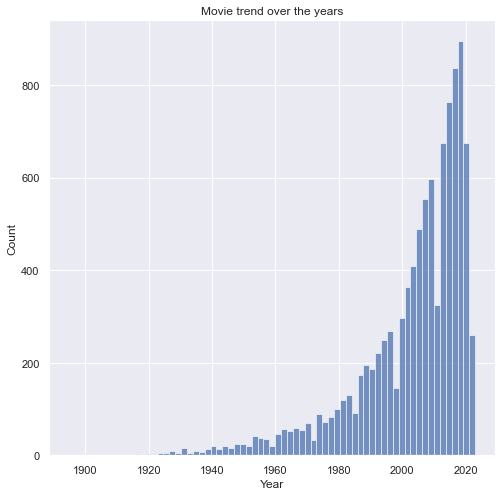

In [337]:
#lets plot 
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='Year')
sns.set_style("darkgrid")

plt.title('Movie trend over the years')
plt.show()


### In general, Movie release trend is increasing over the years but few years we have exceptions. Need to know the cause why in 1998 or 2012 - we have less movie count

## Trend of top 50 movies using line charts 

<AxesSubplot:>

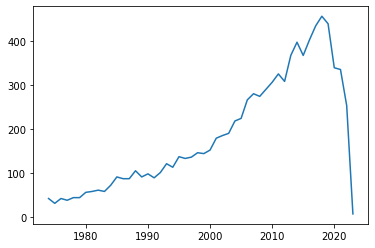

In [313]:
df['Year'].value_counts().sort_index(ascending=False).head(50).plot(kind='line')

## Statistical Analysis 

In [145]:
df[['vote_average','vote_count','popularity','Year']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,vote_average,vote_count,popularity,Year
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,6.723145,1623.915783,23.440615,2003.097219
std,0.675394,2786.740266,71.333559,17.820017
min,5.400000,200.000000,0.600000,1895.000000
25%,6.200000,320.000000,9.497250,1996.000000
50%,6.700000,606.000000,13.313500,2009.000000
75%,7.200000,1540.000000,22.056000,2016.000000
90%,7.600000,3978.000000,40.058400,2019.000000
95%,7.900000,6664.750000,59.808500,2021.000000
99%,8.300000,14976.240000,152.771190,2022.000000


#### when our percentile goes from 99 t0 100 % - we see lot of changes in vote_country , popularity. 

* 50 % of the movies are less popular 
* 50 % of movies has vote count ~ 600


## Lets check for outlier in our dataset

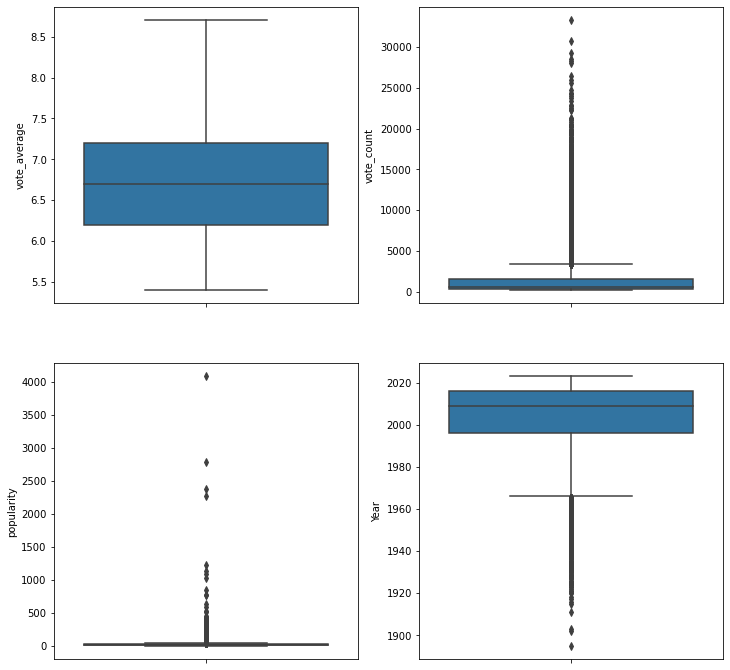

In [239]:

fig, axs = plt.subplots(2, 2,figsize=(12,12))

sns.boxplot(data=df,y='vote_average',ax=axs[0, 0])
#axs[0, 0].set_title('vote_average')

sns.boxplot(data=df,y='vote_count',ax=axs[0, 1])
#axs[0, 1].set_title('vote_count')

sns.boxplot(data=df,y='popularity',ax=axs[1,0])
#axs[1, 0].set_title('popularity')

sns.boxplot(data=df,y='Year',ax=axs[1,1])
#axs[1, 1].set_title('Year')



plt.show()

* Apart from vote_average cloumn other columns are showing outliers. 
* Currently we are not toucing outlier as our main purpose here is to visualize the data.

### As per outlier data, lets analysis movies where rating/vote_average is greater than 8.3

#### vote_average or rating are the same term, so rating in our dataset is same as vote_average

In [247]:
df[df['vote_average'] > 8.3]


,title,overview,release_date,vote_average,vote_count,original_language,popularity,Day,Month,Year
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429,14,3,1972
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717,23,9,1994
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971,14,9,2022
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793,25,12,2022
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662,20,12,1974
5,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,8.6,13818,en,56.298,15,12,1993
6,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-19,8.6,4069,hi,25.749,19,10,1995
7,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2002-09-20,8.5,14006,ja,77.678,20,9,2002
8,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,8.5,7078,en,42.757,10,4,1957
9,Your Name.,High schoolers Mitsuha and Taki are complete s...,2016-08-26,8.5,9555,ja,94.443,26,8,2016


From above result we found the very popular movie with rating 8.5
* Puss in Boots: The Last Wish , this movie is very popular among all other movies having rating above 8.3

* Puss In Boots: The Last Wish was one of my favorite animated movies ever, 
and definitely the best to hit theaters since Into The Spider-Verse. 

* This movie is hilarious, heartfelt, and visually stunning, 
with incredible characters and a fantastic cast of voice actors and soundtrack.

## Top popular movies


In [252]:
df[df['popularity'] ==4083.809000]

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Day,Month,Year
5958,Knock at the Cabin,"While vacationing at a remote cabin, a young g...",2023-02-01,6.5,639,en,4083.809,1,2,2023


* We can see movie is most popular 4083.809 and released in 2023-02-01 but vote average is 6.5 (less as expected).
* May be popularity because of ads, campaign or other source of promotion or movie actor David Michael Bautista

* The ending is disappointing as per user reviews  - but trailer was good

## Is there any releation b/w vote_average and popularity

In [263]:

df[df['vote_average'] > 8.3][['vote_average','popularity']].sort_values(by='popularity',ascending=False)

,vote_average,popularity
22,8.5,2378.726
44,8.4,167.232
43,8.4,138.426
1,8.7,119.717
0,8.7,103.429
40,8.4,98.111
35,8.4,94.868
9,8.5,94.443
47,8.4,86.539
16,8.5,86.323


### we can see there is no relation b/w vote_average and popularity. Movie which are less popular still they have high vote rating

In [275]:
#no need of day and month column  - so lets remove it
df.drop(columns=['Day','Month'],inplace=True)

## Top 10 popular movies

In [276]:
df.sort_values(ascending=False,by='popularity')[:10]

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Year
5958,Knock at the Cabin,"While vacationing at a remote cabin, a young g...",2023-02-01,6.5,639,en,4083.809,2023
1754,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2022-11-09,7.4,3684,en,2782.773,2022
22,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2022-12-07,8.5,4128,en,2378.726,2022
3987,Plane,After a heroic job of successfully landing his...,2023-01-12,6.9,707,en,2266.231,2023
770,Avatar: The Way of Water,Set more than a decade after the events of the...,2022-12-14,7.7,5546,en,1224.144,2022
1373,M3GAN,A brilliant toy company roboticist uses artifi...,2022-12-28,7.5,1833,en,1133.805,2022
6497,Shotgun Wedding,Darcy and Tom gather their families for the ul...,2022-12-28,6.4,563,en,1091.581,2022
5937,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,2023-02-15,6.5,807,en,1025.636,2023
371,The Whale,A reclusive English teacher suffering from sev...,2022-12-09,8.0,626,en,844.847,2022
2762,Black Adam,"Nearly 5,000 years after he was bestowed with ...",2022-10-19,7.2,4305,en,776.428,2022


### All top 10 movies are from en language and came in 2022-2023.


##  Top 10 high rated movies

In [277]:
df.sort_values(ascending=False,by='vote_average')[:10]

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Year
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429,1972
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971,2022
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717,1994
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793,2022
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662,1974
5,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,8.6,13818,en,56.298,1993
6,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-19,8.6,4069,hi,25.749,1995
16,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,2003-12-01,8.5,21212,en,86.323,2003
24,Primal: Tales of Savagery,Genndy Tartakovsky's Primal: Tales of Savagery...,2019-11-21,8.5,258,en,16.206,2019
23,Life Is Beautiful,A touching story of an Italian book seller of ...,1997-12-20,8.5,11737,it,41.204,1997


### Here movie rating is more but vote count is less for some of the movies - may be peole has not given vote.

## Top 10  movies based on vote count

In [286]:
df.sort_values(ascending=False,by='vote_count')[:10]

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Year
53,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,8.4,33257,en,84.393,2010
43,Interstellar,The adventures of a group of explorers who mak...,2014-11-05,8.4,30690,en,138.426,2014
12,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-14,8.5,29259,en,74.564,2008
1173,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-15,7.6,28496,en,592.036,2009
828,The Avengers,When an unexpected enemy emerges and threatens...,2012-04-25,7.7,28245,en,146.526,2012
1078,Deadpool,The origin story of former Special Forces oper...,2016-02-09,7.6,28031,en,121.181,2016
100,Avengers: Infinity War,As the Avengers and their allies have continue...,2018-04-25,8.3,26404,en,305.313,2018
29,Fight Club,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,8.4,25918,en,77.508,1999
469,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",2014-07-30,7.9,25568,en,38.258,2014
13,Pulp Fiction,"A burger-loving hit man, his philosophical par...",1994-09-10,8.5,24742,en,55.544,1994


### Here more vote count movies have high movie rating and all are english movies 
English movies are more liked by people wrt to movies languages

## Correlation check

<AxesSubplot:>

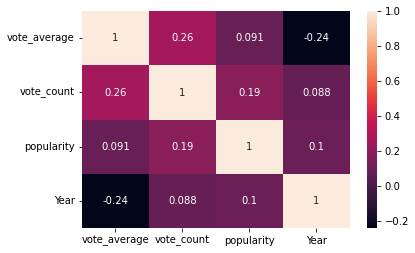

In [285]:
sns.heatmap(df.corr(),annot=True)   


### All features are not much correlated

## Relation between vote_average, vote_count and year featues

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

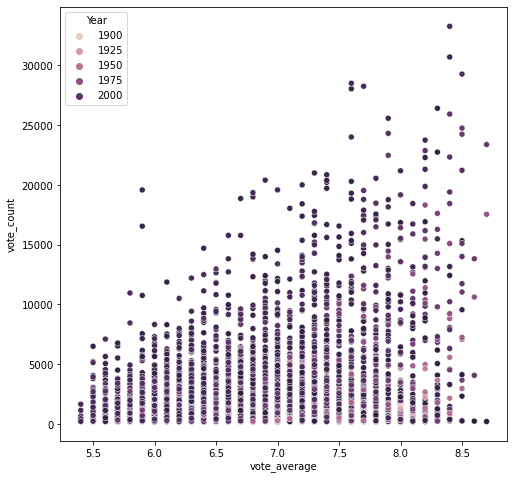

In [299]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='vote_average', y='vote_count',hue='Year')



### High rating movies has high votecount and mostly these are made after 2000 years
This also has direct releation with now a days technologies 

## popularity vs years

<AxesSubplot:xlabel='Year', ylabel='popularity'>

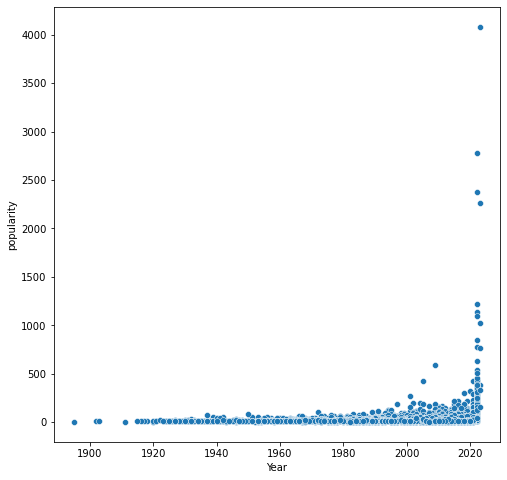

In [305]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='Year', y='popularity')


### Movies are getting more popular after 2020

## Relation between vote_average, popularity and year featues

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

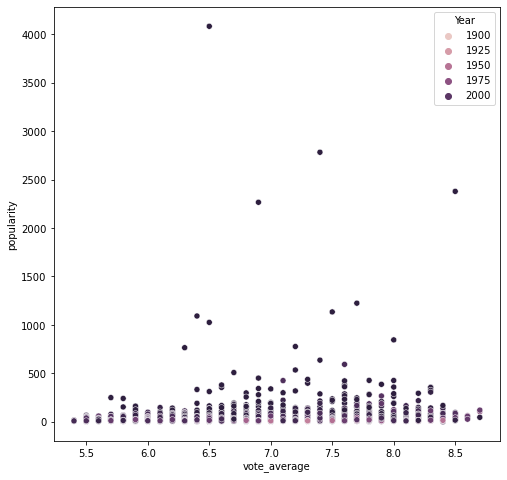

In [300]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='vote_average', y='popularity',hue='Year')

* Most popular movies has rating 6.5
* We have ~ top 10 movies are there which are popular above value 1000 and in range b/w 6.5 to 8.5


## Text preprocessing on overview column using NLTK


In [352]:
import nltk

In [363]:
import string
#way to include punctuation which will use in function 
string.punctuation

from nltk.stem.porter import PorterStemmer
#way to include stem which will use in function 
ps=PorterStemmer()


from nltk.corpus import stopwords




### Create a transform function which do followings 
* Remove stop words, punctuation
* It will also create bag of words from sentences. 
* It will also do stemming 

In [377]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
            
#    return " ".join(y)
    return " ".join(text)

In [378]:
#testing of function with one movie overview 
transform_text('Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.')

'spanning years 1945 1955 chronicle fictional corleone crime family organized crime family patriarch vito corleone barely survives attempt life youngest son michael steps take care killers launching campaign bloody revenge'

### Do tranforamtion and add new column in datasets

In [384]:
df['transformed_text']=df['overview'].apply(transform_text)

## Generate WordCloud for transformed_text column

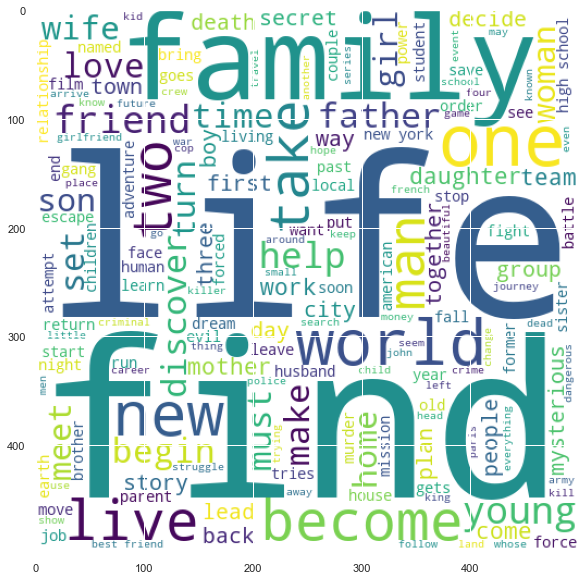

In [389]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

* Movies overview is containg words like Family, life, find followed by world, live, love etc 

* So family related movies, adventure movies are large in numbers

In [385]:
df.head()

,title,overview,release_date,vote_average,vote_count,original_language,popularity,Year,transformed_text
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429,1972,spanning years 1945 1955 chronicle fictional c...
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717,1994,framed 1940s double murder wife lover upstandi...
2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971,2022,malena gets second chance life magically turns...
3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793,2022,unlikely friendship boy mole fox horse traveli...
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662,1974,continuing saga corleone crime family young vi...


In [408]:
df.drop(columns='overview',inplace=True)

In [411]:
df.to_csv('final_df_dataset.csv')